In [8]:
import pandas as pd
import numpy as np

In [9]:
data = pd.read_csv('./insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [10]:
data.shape

(1338, 7)

In [11]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [12]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [13]:
data.drop('region', axis=1, inplace=True)

### Data visualisation

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
% matplotlib inline

Text(0.5, 1.0, 'Distribution of Charges')

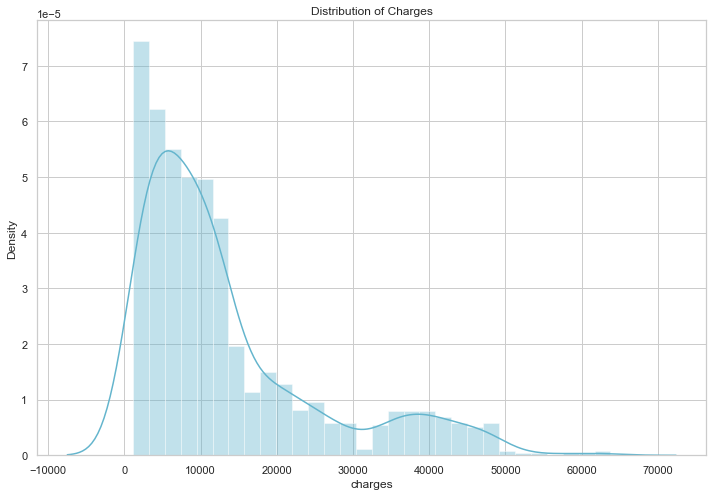

In [15]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.distplot(data['charges'], kde=True, color='c')
plt.title('Distribution of Charges')

In [16]:
##Converting objects labels into categorical
data[['sex', 'smoker']] = data[['sex', 'smoker']].astype('category')
data.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
charges      float64
dtype: object

In [17]:
##Converting category labels into numerical using LabelEncoder

from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
label.fit(data.sex.drop_duplicates())
data.sex = label.transform(data.sex)
label.fit(data.smoker.drop_duplicates())
data.smoker = label.transform(data.smoker)
data.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
charges     float64
dtype: object

### Model training and accuracy

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x = data.drop(['charges'], axis=1)
y = data['charges']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)
model = LinearRegression()
model.fit(X_train, y_train)
print('accuracy:', model.score(X_test, y_test))


accuracy: 0.7777630966249414


In [19]:
import pickle

In [32]:
def store(model: LinearRegression):
    pickle.dump(model, open('model.pickle', 'wb'))


max_accuracy = 0
X = data.drop(['charges'], axis=1)
y = data['charges']

for i in range(1, 50):
    for j in range(1, 100):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i / 100, random_state=j)
        model = LinearRegression()
        model.fit(X_train, y_train)
        accuracy = model.score(X_test, y_test)
        if accuracy > max_accuracy:
            max_accuracy = accuracy
            store(model)

In [33]:
model: LinearRegression = pickle.load(open('model.pickle', 'rb'))
model.score(X_test, y_test)

0.7374740627094827

In [ ]:
max_accuracy